In [69]:
#importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import os
os.getcwd()

'C:\\Users\\FaridSarwari\\OneDrive - BlueGem Capital Partners LLP\\Desktop\\Bluegem\\L&L'

In [5]:
#reading in processed data with sales data and customerID

processed_data = pd.read_csv("LL_Analysis/Processed Data/All_Invoices_W_Items_merged.csv", parse_dates=["InvoiceDate_Parsed"])
processed_data.head()

C:\Users\FaridSarwari\AppData\Local\Temp\ipykernel_12992\2235473292.py:3: DtypeWarning: Columns (8,9,21,24,25,28,29,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  processed_data = pd.read_csv("LL_Analysis/Processed Data/All_Invoices_W_Items_merged.csv", parse_dates=["InvoiceDate_Parsed"])


,DimProductId,EntityProductCode,FactSalesInvoiceId,DimEntityId,DimInvoiceDateId,DimInvoiceCustomerId,DimDeliveryCustomerId,DimOrderCustomerId,InvoiceNumber,OrderNumber,...,GroupProductCategoryLevel2Code,GroupProductCategoryLevel1,GroupProductCategoryLevel2,Brand,CreationDate,CreatedETLRunId,ModifiedETLRunId,GroupBrand,ProdComboID,InvoiceDate_Parsed
0,-7,IAR,4058335.0,1.0,20220910.0,67950.0,67950.0,67950.0,22716190-75,192109,...,NaN,NaN,NaN,Its About Romi,-1,-1,-1,Its about Romi,IAR_-7,2022-09-10 00:00:00+00:00
1,-7,IAR,4143121.0,1.0,20221002.0,67950.0,67950.0,67950.0,22717294-75,195016,...,NaN,NaN,NaN,Its About Romi,-1,-1,-1,Its about Romi,IAR_-7,2022-10-02 00:00:00+00:00
2,-7,IAR,4189653.0,1.0,20221016.0,67950.0,67950.0,67950.0,22718442-75,196744,...,NaN,NaN,NaN,Its About Romi,-1,-1,-1,Its about Romi,IAR_-7,2022-10-16 00:00:00+00:00
3,-7,IAR,4428737.0,6.0,20221227.0,71059.0,71059.0,71059.0,46019342,86015900,...,NaN,NaN,NaN,Its About Romi,-1,-1,-1,Its about Romi,IAR_-7,2022-12-27 00:00:00+00:00
4,-7,IAR,4435879.0,6.0,20230102.0,74328.0,74328.0,74328.0,47000013,86016553,...,NaN,NaN,NaN,Its About Romi,-1,-1,-1,Its about Romi,IAR_-7,2023-01-02 00:00:00+00:00


### EDA

In [ ]:
processed_data.Brand.value_counts()

Light & Living                             3166798
PT LIVING                                   407810
KARLSSON                                    246918
Parlane                                     195268
White label                                 179278
LEITMOTIV                                   140350
Good & Mojo                                 128140
Its about Romi                               94090
Import woonaccessoires China en overige      19828
OTHERS                                       17854
Import woonaccessoires India                 14564
Eigen productie LightMakers                   6564
Import kappen China en overig                 4134
Import armaturen India                        4018
Import compleet lampen India                  4003
Import compleet lampen China en overig        3901
Import armaturen China en overig              1993
Diverse/condities/kostenartikelen              275
Kaarsen                                         76
Zijde bloemen                  

In [14]:
# Filtering for L&L

df_ll = processed_data[processed_data.Brand == "Light & Living"]
df_ll.head()

,DimProductId,EntityProductCode,FactSalesInvoiceId,DimEntityId,DimInvoiceDateId,DimInvoiceCustomerId,DimDeliveryCustomerId,DimOrderCustomerId,InvoiceNumber,OrderNumber,...,GroupProductCategoryLevel2Code,GroupProductCategoryLevel1,GroupProductCategoryLevel2,Brand,CreationDate,CreatedETLRunId,ModifiedETLRunId,GroupBrand,ProdComboID,InvoiceDate_Parsed
70,-4,LM,3044664.0,4.0,20200929.0,26356.0,26356.0,26356.0,P2000991,-1,...,NaN,NaN,NaN,Light & Living,-1,-1,-1,Light & Living,LM_-4,2020-09-29 00:00:00+00:00
71,-4,LM,3044668.0,4.0,20200929.0,26356.0,26356.0,26356.0,P2000992,-1,...,NaN,NaN,NaN,Light & Living,-1,-1,-1,Light & Living,LM_-4,2020-09-29 00:00:00+00:00
72,-4,LM,3044669.0,4.0,20200929.0,26356.0,26356.0,26356.0,P2000992,-1,...,NaN,NaN,NaN,Light & Living,-1,-1,-1,Light & Living,LM_-4,2020-09-29 00:00:00+00:00
73,-4,LM,3044674.0,4.0,20200929.0,26356.0,26356.0,26356.0,P2000992,-1,...,NaN,NaN,NaN,Light & Living,-1,-1,-1,Light & Living,LM_-4,2020-09-29 00:00:00+00:00
74,-4,LM,3044682.0,4.0,20200929.0,26356.0,26356.0,26356.0,P2000992,-1,...,NaN,NaN,NaN,Light & Living,-1,-1,-1,Light & Living,LM_-4,2020-09-29 00:00:00+00:00


In [15]:
# each row represents an order for a customer. Hence, the total number of orders over the period is given by

df_ll.shape

(3166798, 39)

In [17]:
# We select a subset of columns of interest 

df_ll.columns

Index(['DimProductId', 'EntityProductCode', 'FactSalesInvoiceId',
       'DimEntityId', 'DimInvoiceDateId', 'DimInvoiceCustomerId',
       'DimDeliveryCustomerId', 'DimOrderCustomerId', 'InvoiceNumber',
       'OrderNumber', 'InvoiceDate', 'Valuta', 'ExchangeRate',
       'InvoicedQuantity', 'PriceTC', 'SalesTC', 'SalesHC', 'CostTC', 'CostHC',
       'OverallCostTC', 'OverallCostHC', 'ProductCode', 'ProductName',
       'ProductCodeName', 'LocalProductCategoryLevel1Code',
       'LocalProductCategoryLevel2Code', 'LocalProductCategoryLevel1',
       'LocalProductCategoryLevel2', 'GroupProductCategoryLevel1Code',
       'GroupProductCategoryLevel2Code', 'GroupProductCategoryLevel1',
       'GroupProductCategoryLevel2', 'Brand', 'CreationDate',
       'CreatedETLRunId', 'ModifiedETLRunId', 'GroupBrand', 'ProdComboID',
       'InvoiceDate_Parsed'],
      dtype='object')

In [70]:
subset_cols = ['InvoiceDate_Parsed', 'OrderNumber', 'InvoicedQuantity', 'DimProductId', 'EntityProductCode','ProductName','PriceTC', 'SalesHC',  'DimEntityId', 'DimOrderCustomerId']

df_ll_subset = df_ll[subset_cols ]
df_ll_subset.head()

,InvoiceDate_Parsed,OrderNumber,InvoicedQuantity,DimProductId,EntityProductCode,ProductName,PriceTC,SalesHC,DimEntityId,DimOrderCustomerId
70,2020-09-29 00:00:00+00:00,-1,1.0,-4,LM,NaN,4.10,4.485041,4.0,26356.0
71,2020-09-29 00:00:00+00:00,-1,16.0,-4,LM,NaN,2.95,51.632664,4.0,26356.0
72,2020-09-29 00:00:00+00:00,-1,33.0,-4,LM,NaN,4.85,175.080676,4.0,26356.0
73,2020-09-29 00:00:00+00:00,-1,24.0,-4,LM,NaN,3.40,89.263250,4.0,26356.0
74,2020-09-29 00:00:00+00:00,-1,79.0,-4,LM,NaN,1.50,129.628617,4.0,26356.0


In [71]:
df_ll_subset.dtypes

InvoiceDate_Parsed    datetime64[ns, UTC]
OrderNumber                        object
InvoicedQuantity                  float64
DimProductId                        int64
EntityProductCode                  object
ProductName                        object
PriceTC                           float64
SalesHC                           float64
DimEntityId                       float64
DimOrderCustomerId                float64
dtype: object

In [21]:
#checking for null values, we'd need to account for null values in InvoiceDate_Parsed

df_ll_subset.isna().sum()   

InvoiceDate_Parsed    3495
OrderNumber           4097
InvoicedQuantity      3516
DimProductId             0
EntityProductCode        0
ProductName           9731
PriceTC               3517
SalesHC               3495
DimEntityId           3495
DimOrderCustomerId    3495
Year                  3495
Month                 3495
Quarter               3495
dtype: int64

In [23]:
# Adding a separate column for Year, Month and Quarter

df_ll_subset['Year'] = df_ll_subset['InvoiceDate_Parsed'].dt.year 
df_ll_subset['Month'] = df_ll_subset['InvoiceDate_Parsed'].dt.month
df_ll_subset['Quarter'] = df_ll_subset['InvoiceDate_Parsed'].dt.quarter

df_ll_subset.head()


C:\Users\FaridSarwari\AppData\Local\Temp\ipykernel_12992\573948042.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ll_subset['Year'] = df_ll_subset['InvoiceDate_Parsed'].dt.year
C:\Users\FaridSarwari\AppData\Local\Temp\ipykernel_12992\573948042.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ll_subset['Month'] = df_ll_subset['InvoiceDate_Parsed'].dt.month
C:\Users\FaridSarwari\AppData\Local\Temp\ipykernel_12992\573948042.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

,InvoiceDate_Parsed,OrderNumber,InvoicedQuantity,DimProductId,EntityProductCode,ProductName,PriceTC,SalesHC,DimEntityId,DimOrderCustomerId,Year,Month,Quarter
70,2020-09-29 00:00:00+00:00,-1,1.0,-4,LM,NaN,4.10,4.485041,4.0,26356.0,2020.0,9.0,3.0
71,2020-09-29 00:00:00+00:00,-1,16.0,-4,LM,NaN,2.95,51.632664,4.0,26356.0,2020.0,9.0,3.0
72,2020-09-29 00:00:00+00:00,-1,33.0,-4,LM,NaN,4.85,175.080676,4.0,26356.0,2020.0,9.0,3.0
73,2020-09-29 00:00:00+00:00,-1,24.0,-4,LM,NaN,3.40,89.263250,4.0,26356.0,2020.0,9.0,3.0
74,2020-09-29 00:00:00+00:00,-1,79.0,-4,LM,NaN,1.50,129.628617,4.0,26356.0,2020.0,9.0,3.0


In [22]:
# removing null values in datetime column

df_ll_tidy = df_ll_subset.dropna(subset="InvoiceDate_Parsed")

In [25]:
# Some orders appear to not have a corresponding order number, or quantity ordered. But, contain associated revenue and productID for these transactions

# since we have totaly revenue for these order and customer ID, we can ignore these NaN values

df_ll_tidy.isna().sum()

InvoiceDate_Parsed       0
OrderNumber            602
InvoicedQuantity        21
DimProductId             0
EntityProductCode        0
ProductName           9721
PriceTC                 22
SalesHC                  0
DimEntityId              0
DimOrderCustomerId       0
Year                     0
Month                    0
Quarter                  0
dtype: int64

In [48]:
# Making the Year, Month and Quarter columns integer 

df_ll_tidy['Year'] = df_ll_tidy['Year'].astype(int)
df_ll_tidy['Month'] = df_ll_tidy['Month'].astype(int)
df_ll_tidy['Quarter'] = df_ll_tidy['Quarter'].astype(int)

C:\Users\FaridSarwari\AppData\Local\Temp\ipykernel_12992\3117597844.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ll_tidy['Year'] = df_ll_tidy['Year'].astype(int)
C:\Users\FaridSarwari\AppData\Local\Temp\ipykernel_12992\3117597844.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ll_tidy['Month'] = df_ll_tidy['Month'].astype(int)
C:\Users\FaridSarwari\AppData\Local\Temp\ipykernel_12992\3117597844.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [26]:
#summary stats of the quant variables

#quantity invoice salesHC (revenue) and price all contain negative values. This could indicate returns
# We are interested in positive revenue

quant_vars = ['InvoicedQuantity','SalesHC', 'PriceTC']
df_ll_tidy[quant_vars].describe()

,InvoicedQuantity,SalesHC,PriceTC
count,3.163282e+06,3.163303e+06,3.163281e+06
mean,3.394964e+00,6.914161e+01,5.000804e+01
std,8.802639e+01,2.438468e+02,2.760378e+02
min,-4.080000e+03,-8.538300e+04,-1.000000e+04
25%,1.000000e+00,2.195000e+01,1.075000e+01
50%,2.000000e+00,4.333000e+01,2.195000e+01
75%,4.000000e+00,7.973000e+01,4.450000e+01
max,1.533770e+05,1.423050e+05,2.000000e+05


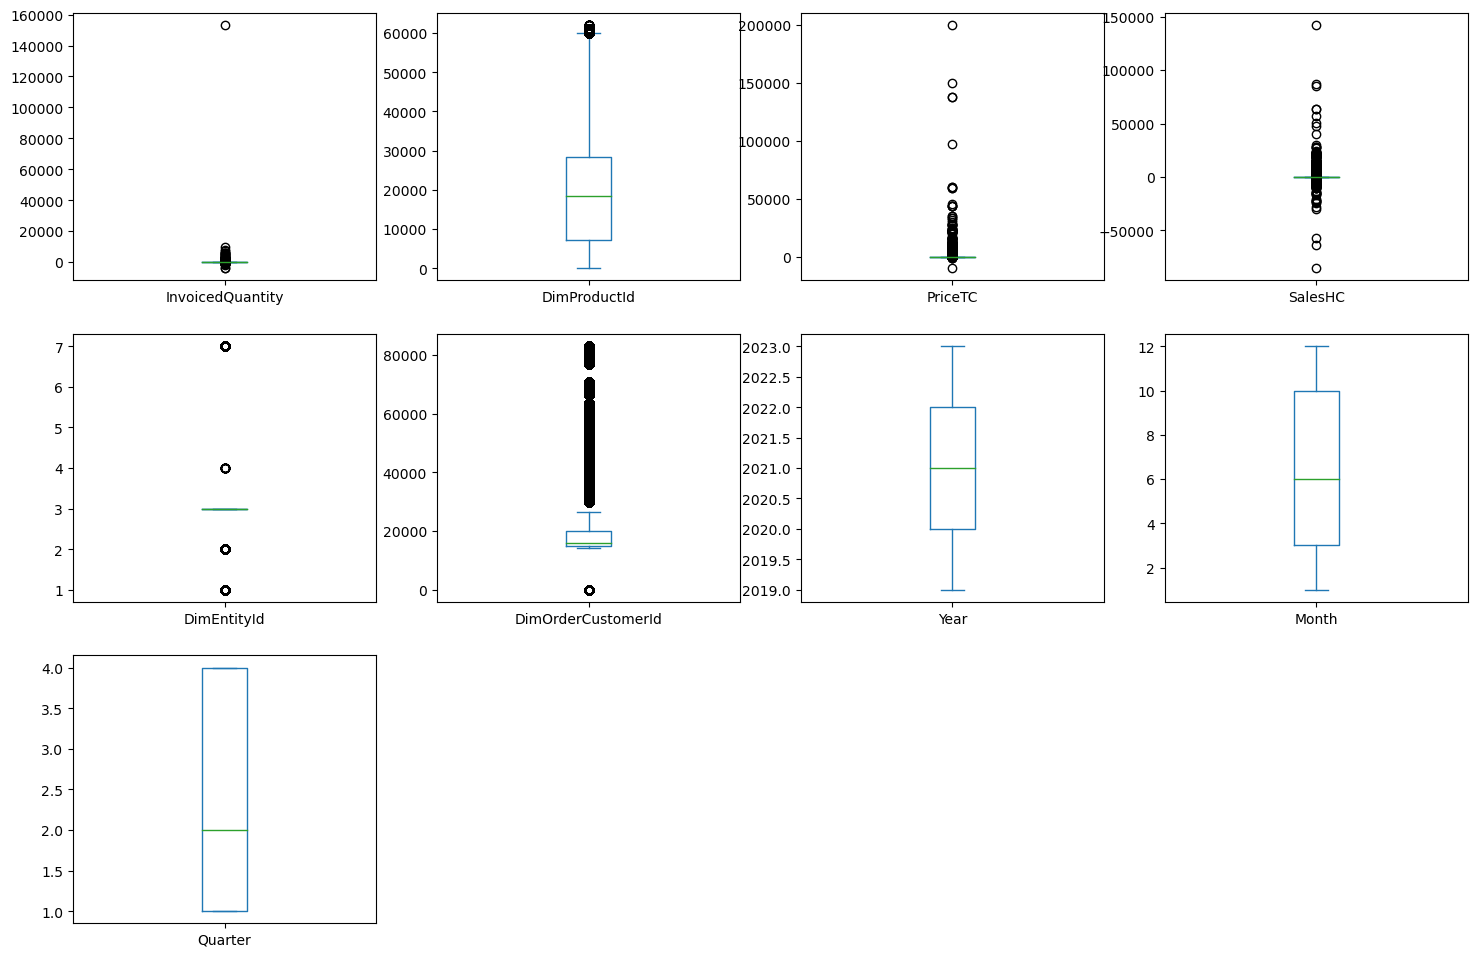

In [27]:
# Let's plot the data to get more insight.

plt.rcParams['figure.figsize'] = [18, 16]

df_ll_tidy.plot(kind="box",subplots=True,layout=(4,4),sharex=False,sharey=False)
plt.show()

In [50]:
# Total un-adjuested revenue. That is including order with <0 revenue

df_ll_tidy.shape

(3163303, 13)

In [49]:
# Total adjusted orders, that is positive revenue

df_ll_tidy_adj = df_ll_tidy[df_ll_tidy.SalesHC>0]
df_ll_tidy_adj.shape

(2956161, 13)

C:\Users\FaridSarwari\anaconda5\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


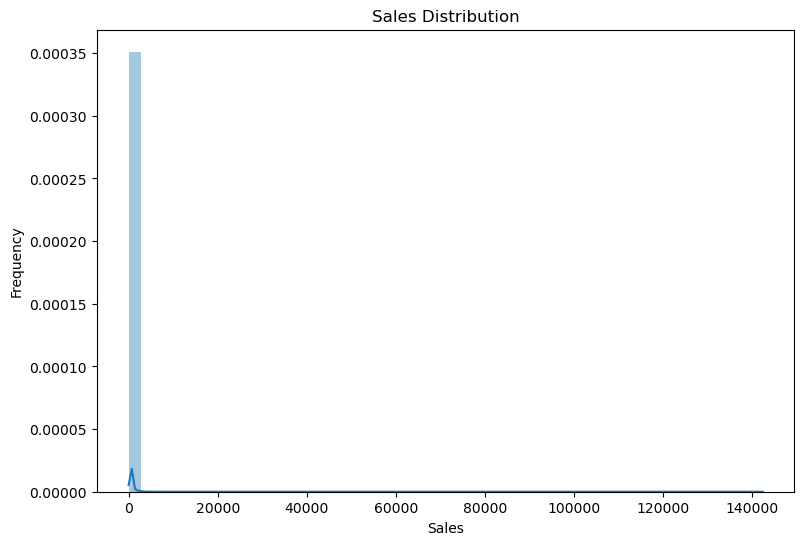

In [34]:
#adjuested revenue dist

plt.figure(figsize=(9,6))

import seaborn as sns

sns.distplot(df_ll_tidy_adj['SalesHC'])
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

In [51]:
# Convert to float first to handle '26356.0' like strings
df_ll_tidy_adj['DimOrderCustomerId'] = df_ll_tidy_adj['DimOrderCustomerId'].astype(float)

# Then convert to integer to remove the decimal point
df_ll_tidy_adj['DimOrderCustomerId'] = df_ll_tidy_adj['DimOrderCustomerId'].astype(int)

# Finally, convert to string
df_ll_tidy_adj['DimOrderCustomerId'] = df_ll_tidy_adj['DimOrderCustomerId'].astype(str)

df_ll_tidy_adj.head()

C:\Users\FaridSarwari\AppData\Local\Temp\ipykernel_12992\2995722389.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ll_tidy_adj['DimOrderCustomerId'] = df_ll_tidy_adj['DimOrderCustomerId'].astype(float)
C:\Users\FaridSarwari\AppData\Local\Temp\ipykernel_12992\2995722389.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ll_tidy_adj['DimOrderCustomerId'] = df_ll_tidy_adj['DimOrderCustomerId'].astype(int)
C:\Users\FaridSarwari\AppData\Local\Temp\ipykernel_12992\2995722389.py:8: SettingWithCopyWarni

,InvoiceDate_Parsed,OrderNumber,InvoicedQuantity,DimProductId,EntityProductCode,ProductName,PriceTC,SalesHC,DimEntityId,DimOrderCustomerId,Year,Month,Quarter
70,2020-09-29 00:00:00+00:00,-1,1.0,-4,LM,NaN,4.10,4.485041,4.0,26356,2020,9,3
71,2020-09-29 00:00:00+00:00,-1,16.0,-4,LM,NaN,2.95,51.632664,4.0,26356,2020,9,3
72,2020-09-29 00:00:00+00:00,-1,33.0,-4,LM,NaN,4.85,175.080676,4.0,26356,2020,9,3
73,2020-09-29 00:00:00+00:00,-1,24.0,-4,LM,NaN,3.40,89.263250,4.0,26356,2020,9,3
74,2020-09-29 00:00:00+00:00,-1,79.0,-4,LM,NaN,1.50,129.628617,4.0,26356,2020,9,3


#### Reading in customer data

In [36]:
customer_data = pd.read_csv("LL_Analysis/OneDrive_2023-07-03/Bluegem Data/Customerdata.csv")
customer_data.head()

,DimCustomerId,EntityCode,CustomerNumber,CustomerCode,CustomerName,CustomerAddress,PostalCode,City,CountryCode,CountryName,...,ClassificationName,MarketClassification,Segment,CreatedETLRunId,ModifiedETLRunId,CustomerCodeName,CountryGroupCode,CountryGroupName,GroupCustomerSegmentName,MarketClassificationGroup
0,-7,IAR,_N/A,_N/A,_N/A,_N/A,_N/A,_N/A,_N/A,_N/A,...,_N/A,Small Business Retail,_N/A,-1,-1,_N/A,_N/A,_N/A,_N/A,NaN
1,-6,DHL,_N/A,_N/A,_N/A,NaN,NaN,NaN,NL,Netherlands,...,Light&Living,E-commerce Business Retail,Pure Online Retailer,-1,17590,DHL - _N/A - _N/A,NL,Netherlands,Pure Online Retailer,E-commerce Business Retail
2,-5,PT,_N/A,_N/A,_N/A,_N/A,_N/A,_N/A,_N/A,_N/A,...,_N/A,Small Business Retail,_N/A,-1,-1,_N/A,_N/A,_N/A,NaN,NaN
3,-4,PA,_N/A,_N/A,_N/A,_N/A,_N/A,_N/A,_N/A,_N/A,...,_N/A,Small Business Retail,_N/A,-1,-1,_N/A,_N/A,_N/A,NaN,NaN
4,-3,LM,_N/A,_N/A,_N/A,_N/A,_N/A,_N/A,_N/A,_N/A,...,_N/A,Small Business Retail,_N/A,-1,-1,_N/A,_N/A,_N/A,NaN,NaN


In [52]:
# Convert 'DimOrderCustomerId' in df_ll_tidy to string
#df_ll_tidy['DimOrderCustomerId'] = df_ll_tidy['DimOrderCustomerId'].astype(str)

# Convert 'DimCustomerId' in customer_data to string
customer_data['DimCustomerId'] = customer_data['DimCustomerId'].astype(str)

# Now perform the merge
merged_df = pd.merge(df_ll_tidy_adj, customer_data, left_on="DimOrderCustomerId", right_on="DimCustomerId")
merged_df.head()

,InvoiceDate_Parsed,OrderNumber,InvoicedQuantity,DimProductId,EntityProductCode,ProductName,PriceTC,SalesHC,DimEntityId,DimOrderCustomerId,...,ClassificationName,MarketClassification,Segment,CreatedETLRunId,ModifiedETLRunId,CustomerCodeName,CountryGroupCode,CountryGroupName,GroupCustomerSegmentName,MarketClassificationGroup
0,2020-09-29 00:00:00+00:00,-1,1.0,-4,LM,NaN,4.10,4.485041,4.0,26356,...,_N/A,Large Business Retail,DEPARTMENT STORE,215,17618,PA - 06922 - TJX UK,GB,United Kingdom,Department Store,Large Business Retail
1,2020-09-29 00:00:00+00:00,-1,16.0,-4,LM,NaN,2.95,51.632664,4.0,26356,...,_N/A,Large Business Retail,DEPARTMENT STORE,215,17618,PA - 06922 - TJX UK,GB,United Kingdom,Department Store,Large Business Retail
2,2020-09-29 00:00:00+00:00,-1,33.0,-4,LM,NaN,4.85,175.080676,4.0,26356,...,_N/A,Large Business Retail,DEPARTMENT STORE,215,17618,PA - 06922 - TJX UK,GB,United Kingdom,Department Store,Large Business Retail
3,2020-09-29 00:00:00+00:00,-1,24.0,-4,LM,NaN,3.40,89.263250,4.0,26356,...,_N/A,Large Business Retail,DEPARTMENT STORE,215,17618,PA - 06922 - TJX UK,GB,United Kingdom,Department Store,Large Business Retail
4,2020-09-29 00:00:00+00:00,-1,79.0,-4,LM,NaN,1.50,129.628617,4.0,26356,...,_N/A,Large Business Retail,DEPARTMENT STORE,215,17618,PA - 06922 - TJX UK,GB,United Kingdom,Department Store,Large Business Retail


In [53]:
merged_df_final = merged_df[['InvoiceDate_Parsed', 'OrderNumber', 'InvoicedQuantity', 'DimProductId', 'EntityProductCode','ProductName','PriceTC', 'SalesHC',  'DimEntityId', 'DimOrderCustomerId', "Year", "MarketClassification"]]

In [54]:
merged_df_final.head()

,InvoiceDate_Parsed,OrderNumber,InvoicedQuantity,DimProductId,EntityProductCode,ProductName,PriceTC,SalesHC,DimEntityId,DimOrderCustomerId,Year,MarketClassification
0,2020-09-29 00:00:00+00:00,-1,1.0,-4,LM,NaN,4.10,4.485041,4.0,26356,2020,Large Business Retail
1,2020-09-29 00:00:00+00:00,-1,16.0,-4,LM,NaN,2.95,51.632664,4.0,26356,2020,Large Business Retail
2,2020-09-29 00:00:00+00:00,-1,33.0,-4,LM,NaN,4.85,175.080676,4.0,26356,2020,Large Business Retail
3,2020-09-29 00:00:00+00:00,-1,24.0,-4,LM,NaN,3.40,89.263250,4.0,26356,2020,Large Business Retail
4,2020-09-29 00:00:00+00:00,-1,79.0,-4,LM,NaN,1.50,129.628617,4.0,26356,2020,Large Business Retail


In [55]:
merged_df_final.MarketClassification.unique()

array(['Large Business Retail', 'Small Business Retail',
       'E-commerce Business Retail', 'White Label', 'Cash & Carry',
       '_N/A', 'Small business Retail', 'small business retail'],
      dtype=object)

In [56]:
segments_per_year = merged_df_final.groupby(["Year", "MarketClassification"])["DimOrderCustomerId"].nunique()
segments_per_year = pd.DataFrame(segments_per_year)

In [57]:
segments_per_year_df = segments_per_year.reset_index()
segments_per_year_df.head()

,Year,MarketClassification,DimOrderCustomerId
0,2019,Cash & Carry,5
1,2019,E-commerce Business Retail,58
2,2019,Large Business Retail,911
3,2019,Small Business Retail,5189
4,2019,White Label,9


In [58]:
df_rev_by_segement = merged_df_final.groupby(["Year", "MarketClassification"])['SalesHC'].sum().reset_index()
df_rev_by_segement.head()

,Year,MarketClassification,SalesHC
0,2019,Cash & Carry,5.070127e+06
1,2019,E-commerce Business Retail,1.299842e+06
2,2019,Large Business Retail,1.197861e+07
3,2019,Small Business Retail,2.296112e+07
4,2019,White Label,6.860409e+05


In [66]:
df_final = pd.merge(df_rev_by_segement, segments_per_year_df, on=["MarketClassification", "Year"])
df_final 

,Year,MarketClassification,SalesHC,DimOrderCustomerId
0,2019,Cash & Carry,5.070127e+06,5
1,2019,E-commerce Business Retail,1.299842e+06,58
2,2019,Large Business Retail,1.197861e+07,911
3,2019,Small Business Retail,2.296112e+07,5189
4,2019,White Label,6.860409e+05,9
5,2020,Cash & Carry,6.031793e+06,5
6,2020,E-commerce Business Retail,3.436658e+06,88
7,2020,Large Business Retail,1.500858e+07,883
8,2020,Small Business Retail,2.433494e+07,4923
9,2020,White Label,2.269799e+05,3


In [67]:
df_final.to_excel("L&L_Revenue_by_segment.xlsx")

In [68]:
import os
os.getcwd()

'C:\\Users\\FaridSarwari\\OneDrive - BlueGem Capital Partners LLP\\Desktop\\Bluegem\\L&L'